In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [379]:
df = pd.read_csv(
    'data/rawdata/combined_dataform1.csv')

In [380]:
df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Personal => Stipan Aleksandar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Personal,Ereignistag,Fahrerzeit <font size=\'1\'>(im Monat)</font>,Pause <font size=\'1\'>(im Monat)</font>,gesetzl. Pause <font size=\'1\'>(im Monat)</font>,Insgesamt <font size=\'1\'>(im Monat)</font>,Std. Lohn,geleist. Bruttolohn <font size=\'1\'>(im Monat...,Sollzeit <font size=\'1\'>(im Monat)</font>,+- Diff. <font size=\'1\'>(im Monat)</font>,mtl. Bruttolohn <font size=\'1\'>(lt. Arbeitsv...,+- Guthaben Vormonat,geleist. Bruttolohn <font size=\'1\'>(im Monat...,Urlaub <br>5,Krank <br>0,Insgesamt Bruttolohn <font size=\'1\'>(im Mona...,Auszahlung Lohn,+- Rest-Guthaben
2,Stipan Aleksandar,01.2022,8480,474,566,7914,0,0,124.61,7.290000000000006,0,0,0,0,0,0,0,0
3,Personal,Ereignistag,Fahrer Zeit,Pause,gesetzl. Pause,Insgesamt,Std. Lohn,Lohn,Soll,+- Diff.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Stipan Aleksandar,2022-01-10 00:00:00,453,36,36,417,0,0,7.33,-0.3799999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,Stipan Aleksandar,2021-12-29 00:00:00,202522,Hinfahrt,29.12.2021 07:28,07:30,25,29.12.2021 16:34,521,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,Stipan Aleksandar,2021-12-30 00:00:00,492,30,30,462,0,0,7.33,0.3700000000000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205,Personal,Ereignistag,Auftrag Nr.,Fahrtrichtung,Beginn Auftrag,Abholung/ Zustellung,Pause,Ende Auftrag,Auftragszeit Insgesamt,Std. Lohn,Lohn,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,Personal,Ereignistag,Auftrag Nr.,Fahrtrichtung,Beginn Auftrag,Abholung/ Zustellung,Pause,Ende Auftrag,Auftragszeit Insgesamt,Std. Lohn,Lohn,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
df.rename(columns={'Unnamed: 0': 'id', 'Unnamed: 1': 'date','Unnamed: 2': 'drive_time_min', 'Unnamed: 3': 'pause_had_min', 'Unnamed: 4': 'pause_should_min' }, inplace=True)

In [382]:
clean = df.loc[df['id'] == 'Stipan Aleksandar']

In [383]:
clean_columns = clean.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], axis=1)

In [384]:
df = clean_columns
df['drive_time_min'] = df['drive_time_min'].astype(int)

In [385]:
df = df.drop(df[(df['pause_had_min'] == 'Hinfahrt') | (df['drive_time_min'] > 1000)].index)

In [386]:
df.isnull().sum()

id                   0
date                 0
drive_time_min       0
pause_had_min       13
pause_should_min     0
dtype: int64

In [387]:
df = df.fillna(0)

In [388]:
df['pause_should_min'] = df['pause_should_min'].astype(int)
df['pause_had_min'] = df['pause_had_min'].astype(int)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

In [389]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 4 to 1204
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                319 non-null    object        
 1   date              319 non-null    datetime64[ns]
 2   drive_time_min    319 non-null    int32         
 3   pause_had_min     319 non-null    int32         
 4   pause_should_min  319 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 11.2+ KB


In [390]:
df = df.drop(df[df['drive_time_min'] < 180].index)
df

,id,date,drive_time_min,pause_had_min,pause_should_min
4,Stipan Aleksandar,2022-01-10,453,36,36
8,Stipan Aleksandar,2022-01-11,593,30,45
12,Stipan Aleksandar,2022-01-12,508,26,30
16,Stipan Aleksandar,2022-01-13,457,29,30
20,Stipan Aleksandar,2022-01-14,487,28,30
...,...,...,...,...,...
1188,Stipan Aleksandar,2021-12-24,268,0,0
1192,Stipan Aleksandar,2021-12-27,583,0,45
1196,Stipan Aleksandar,2021-12-28,563,0,45
1200,Stipan Aleksandar,2021-12-29,546,25,30


In [391]:
# Sort DataFrame by 'date' column
df = df.sort_values('date')

# Display the starting and last 10 dates
print("Starting dates:")
print(df['date'].head(10))
print("\nLast 10 dates:")
print(df['date'].tail(10))

Starting dates:
338   2021-05-01
341   2021-05-03
344   2021-05-04
347   2021-05-05
350   2021-05-06
353   2021-05-07
356   2021-05-10
359   2021-05-11
362   2021-05-12
365   2021-05-13
Name: date, dtype: datetime64[ns]

Last 10 dates:
909   2022-08-19
913   2022-08-22
917   2022-08-23
921   2022-08-24
925   2022-08-25
929   2022-08-26
933   2022-08-27
937   2022-08-29
941   2022-08-30
945   2022-08-31
Name: date, dtype: datetime64[ns]


In [392]:
df['total_time_hour'] = (df['drive_time_min'] + df['pause_should_min']) / 60

In [393]:
df.describe()

,date,drive_time_min,pause_had_min,pause_should_min,total_time_hour
count,318,318.000000,318.000000,318.000000,318.000000
mean,2021-12-10 16:18:06.792452864,499.578616,25.308176,32.191824,8.862841
min,2021-05-01 00:00:00,268.000000,0.000000,0.000000,4.466667
25%,2021-08-16 06:00:00,470.000000,25.250000,30.000000,8.333333
50%,2021-11-30 12:00:00,489.000000,29.000000,30.000000,8.666667
75%,2022-03-24 18:00:00,532.000000,30.000000,32.000000,9.379167
max,2022-08-31 00:00:00,705.000000,49.000000,49.000000,12.500000
std,NaN,54.137736,10.722158,6.690381,0.989072


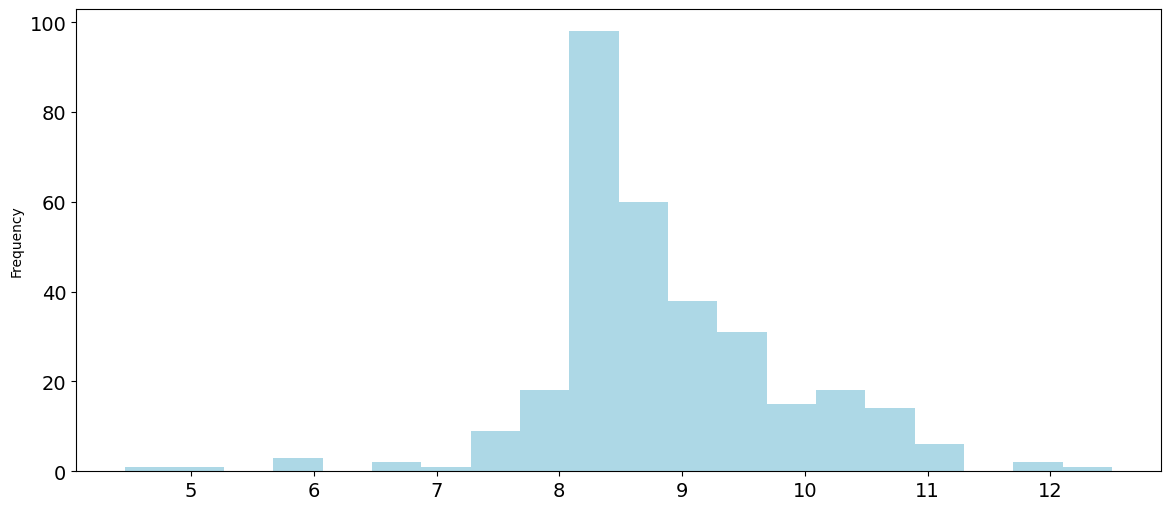

In [394]:
x = df['total_time_hour'].plot(kind='hist', figsize=(14, 6), bins=20, fontsize=14, color='lightblue')


<Axes: xlabel='date'>

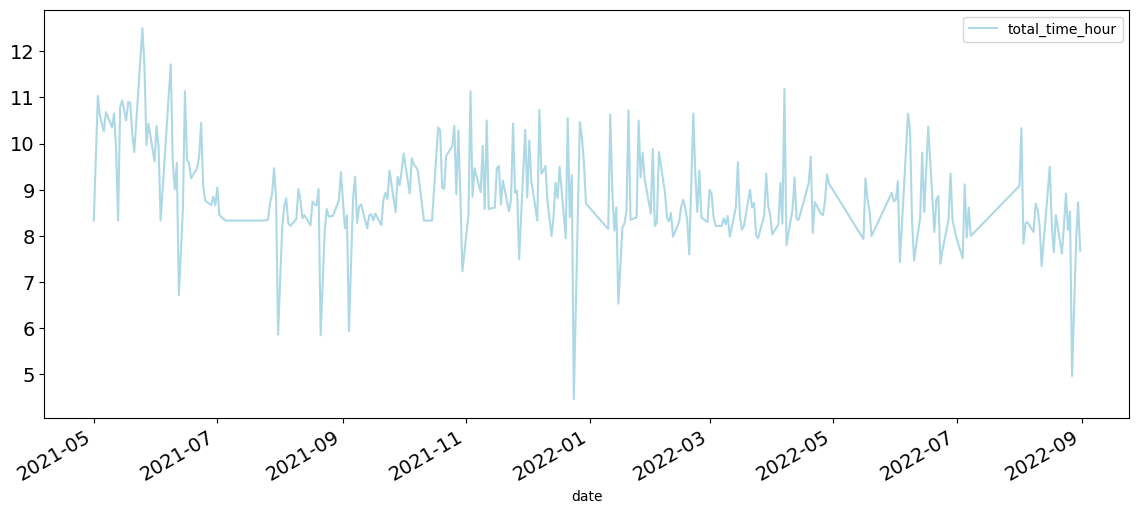

In [395]:
df.plot(x='date', y='total_time_hour', figsize=(14, 6), fontsize=14, color='lightblue')

In [396]:
df.to_csv('cleaned_data1.csv', index=False)